In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3.1 Problem - 1: Getting Started with Data Exploration

1. Data Exploration and Understanding:

In [128]:
import pandas as pd
# Load the dataset
file_path = '/content/drive/My Drive/WHR-2024-5CS037.csv'
df = pd.read_csv(file_path)
# 1. Display the first 10 rows
print(df.head(10))

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

In [129]:

# 2. Identify the number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# 3. List all columns and their data types
print(df.dtypes)

Number of rows: 143
Number of columns: 9
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [130]:
# 1. Calculate mean, median, and standard deviation for the Score column
mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()
print(f"Mean score: {mean_score}")
print(f"Median score: {median_score}")
print(f"Standard Deviation of score: {std_score}")

Mean score: 5.52758041958042
Median score: 5.785
Standard Deviation of score: 1.1707165099442995


In [131]:
# 2. Identify the country with the highest and lowest happiness scores
max_score_country = df.loc[df['score'].idxmax()]
min_score_country = df.loc[df['score'].idxmin()]
print(f"Country with the highest happiness score: {max_score_country['Country name']}")
print(f"Country with the lowest happiness score: {min_score_country['Country name']}")

Country with the highest happiness score: Finland
Country with the lowest happiness score: Afghanistan


In [132]:
# 1. Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [133]:
# 1. Filter the dataset to show only the countries with a Score > 7.5
filtered_df = df[df['score'] > 7.5]

# 2. Sort the filtered dataset by GDP per Capita in descending order and display top 10 rows
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False).head(10)
print(sorted_df)

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [134]:
# 1. Create a new column 'Happiness Category' based on the Score
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif score <= 6:
        return 'Medium'
    else:
        return 'High'
df['Happiness Category'] = df['score'].apply(categorize_happiness)

# **2. Data Visualizations:**

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = '/content/drive/My Drive/WHR-2024-5CS037.csv'
df = pd.read_csv(file_path)

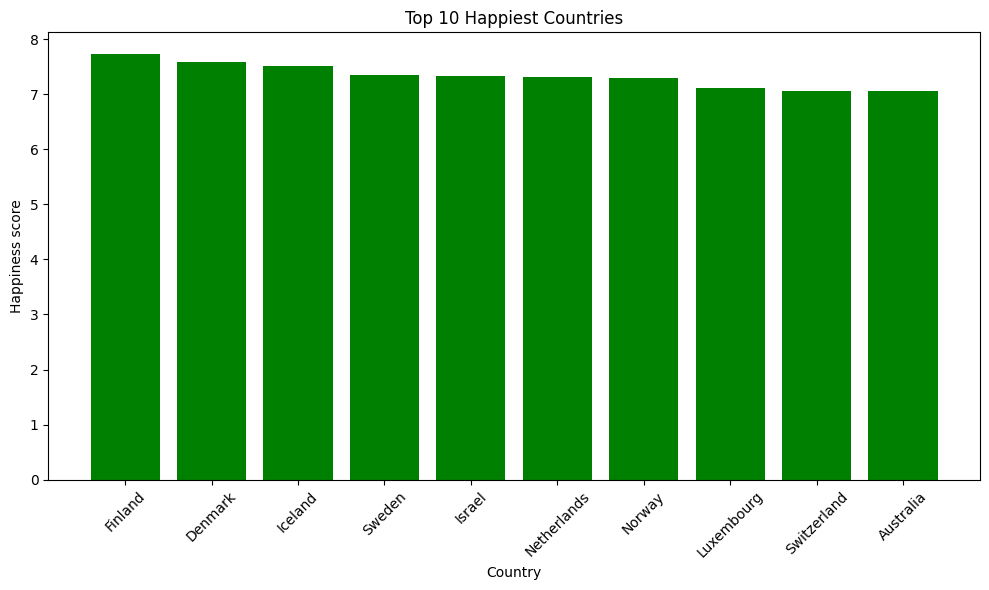

In [136]:
# 1. Bar Plot: Top 10 Happiest Countries by score
top_10_happiest = df.nlargest(10, 'score')

plt.figure(figsize=(10, 6))
plt.bar(top_10_happiest['Country name'], top_10_happiest['score'], color='green')
plt.xlabel('Country')
plt.ylabel('Happiness score')
plt.title('Top 10 Happiest Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


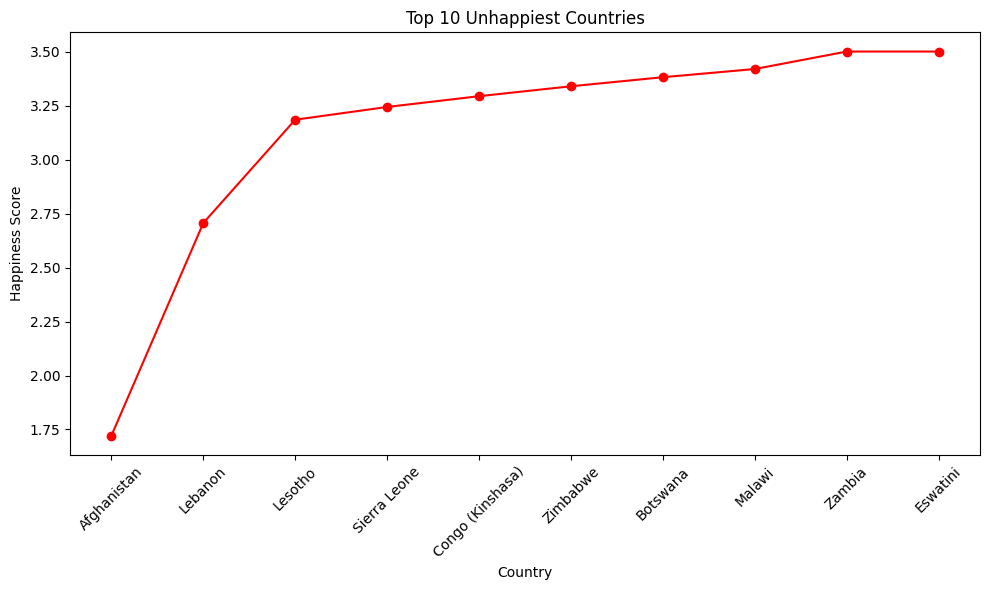

In [137]:
# 2. Line Plot: Top 10 Unhappiest Countries by Score
top_10_unhappiest = df.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', linestyle='-', color='red')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Unhappiest Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

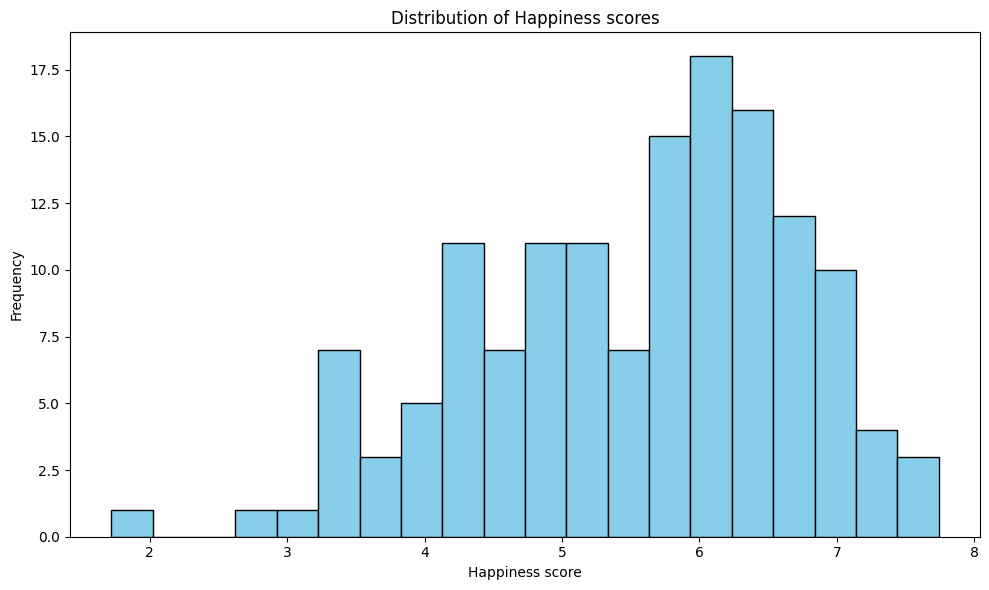

In [138]:
# 3. Histogram: Distribution of the Score Column
plt.figure(figsize=(10, 6))
plt.hist(df['score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Happiness score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness scores')
plt.tight_layout()
plt.show()


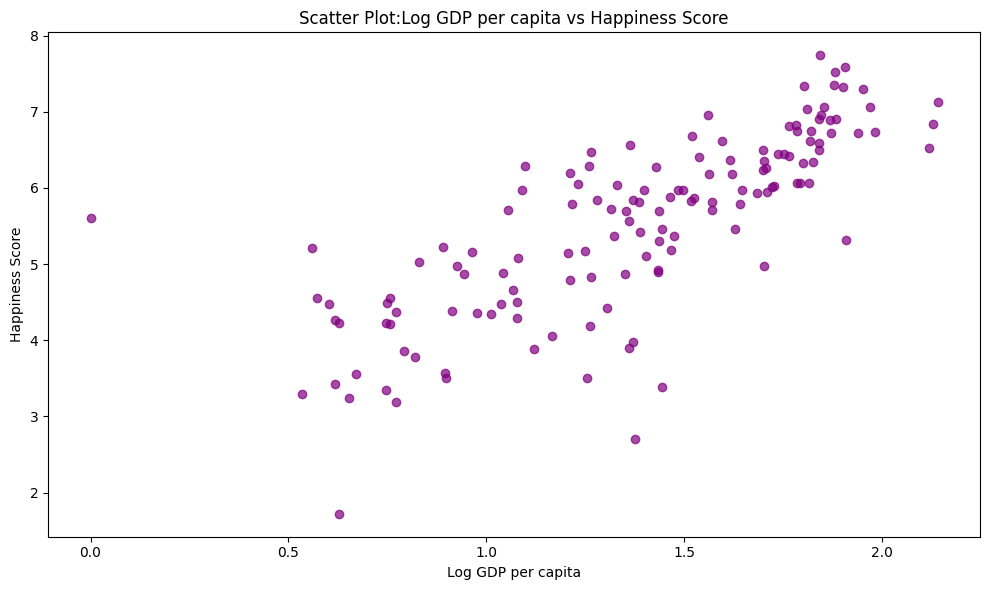

In [139]:
# 4. Scatter Plot: Relationship between GDP per Capita and Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Log GDP per capita'], df['score'], alpha=0.7, color='purple')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot:Log GDP per capita vs Happiness Score')
plt.tight_layout()
plt.show()

# **3.2 Problem - 2 - Some Advance Data Exploration Task:**

## Task - 1 - Setup Task - Preparing the South-Asia Dataset:

In [140]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/My Drive/WHR-2024-5CS037.csv'
df = pd.read_csv(file_path)

# Step 1: Define the list of South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"]

# Step 2: Filter the dataset for South Asian countries
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

# Display the filtered dataframe to verify
print("Filtered South Asia Dataset:")
print(south_asia_df)

# Step 3: Save the filtered dataframe as a separate CSV file
south_asia_df.to_csv('south_asia_dataset.csv', index=False)
print("South Asia dataset has been saved as 'south_asia_dataset.csv'.")

Filtered South Asia Dataset:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual  
92                       0.115                1.783  
107                      0.074         

Task - 2 - Composite Score Ranking:

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the South Asia dataset (from the previous step)
south_asia_df = pd.read_csv('south_asia_dataset.csv')

# Step 1: Create the Composite Score
# Ensure the necessary columns exist: 'GDP per Capita', 'Social Support', 'Healthy Life Expectancy'
south_asia_df['Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)

# Step 2: Rank the South Asian countries based on the Composite Score
south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False).reset_index(drop=True)

# Display the ranked dataset
print("South Asia Dataset with Composite Score Ranking:")
print(south_asia_df[['Country name', 'Composite Score']])


South Asia Dataset with Composite Score Ranking:
  Country name  Composite Score
0        Nepal           0.8159
1        India           0.7874
2     Pakistan           0.7039
3   Bangladesh           0.6774
4  Afghanistan           0.3238


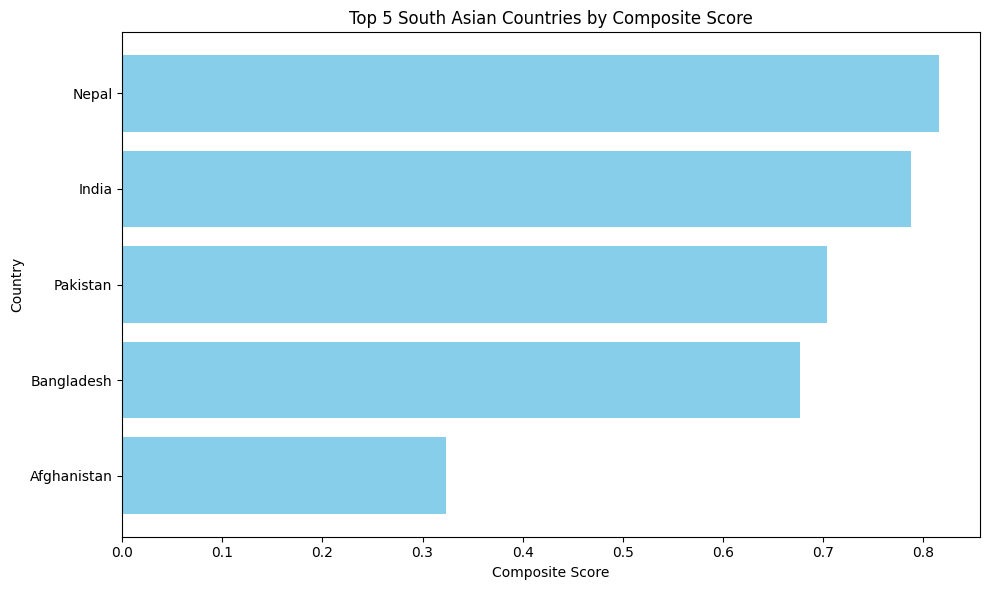

In [142]:
# Step 3: Visualize the top 5 countries using a horizontal bar chart
top_5_countries = south_asia_df.head(5)
plt.figure(figsize=(10, 6))
plt.barh(top_5_countries['Country name'], top_5_countries['Composite Score'], color='skyblue')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest rank at the top
plt.tight_layout()
plt.show()

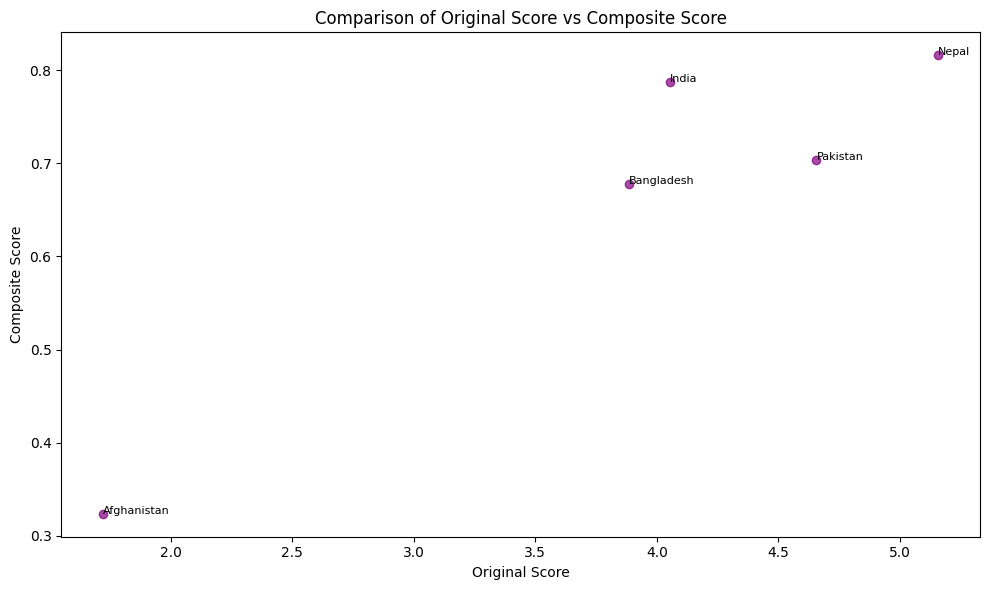

In [143]:
# Step 4: Compare Composite Score Rankings with Original Score
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['score'], south_asia_df['Composite Score'], color='purple', alpha=0.7)
for i in range(len(south_asia_df)):
    plt.text(
        x=south_asia_df['score'].iloc[i],
        y=south_asia_df['Composite Score'].iloc[i],
        s=south_asia_df['Country name'].iloc[i],
        fontsize=8
    )
plt.xlabel('Original Score')
plt.ylabel('Composite Score')
plt.title('Comparison of Original Score vs Composite Score')
plt.tight_layout()
plt.show()


Task - 3 - Outlier Detection:

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the South Asia dataset
south_asia_df = pd.read_csv('south_asia_dataset.csv')

# Step 1 & 2: Identify Outliers using the 1.5 × IQR Rule
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers for Score
score_outliers, score_lower, score_upper = detect_outliers(south_asia_df, 'score')
print(f"Outliers based on score:\n{score_outliers[['Country name', 'score']]}")

# Detect outliers for GDP per Capita
gdp_outliers, gdp_lower, gdp_upper = detect_outliers(south_asia_df, 'Log GDP per capita')
print(f"Outliers based on Log GDP per capita:\n{gdp_outliers[['Country name', 'Log GDP per capita']]}")

# Combine outliers for visualization
combined_outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

Outliers based on score:
  Country name  score
4  Afghanistan  1.721
Outliers based on Log GDP per capita:
  Country name  Log GDP per capita
4  Afghanistan               0.628


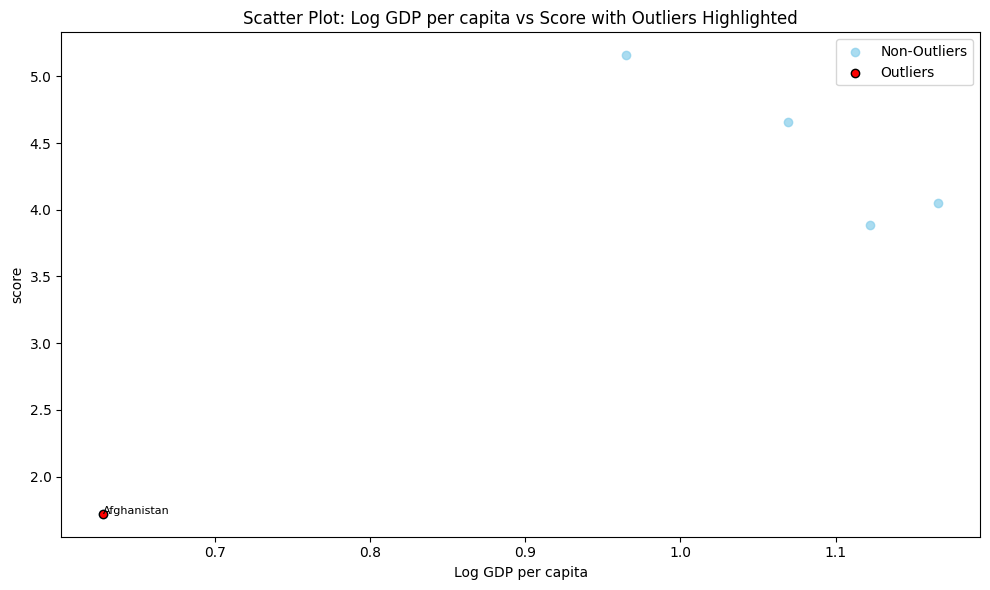

In [145]:
# Step 3: Scatter Plot with Highlighted Outliers
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], alpha=0.7, label='Non-Outliers', color='skyblue')
plt.scatter(combined_outliers['Log GDP per capita'], combined_outliers['score'], color='red', label='Outliers', edgecolor='black')

# Annotate outliers for clarity
for i in range(len(combined_outliers)):
    plt.text(
        x=combined_outliers['Log GDP per capita'].iloc[i],
        y=combined_outliers['score'].iloc[i],
        s=combined_outliers['Country name'].iloc[i],
        fontsize=8,
        color='black'
    )

plt.xlabel('Log GDP per capita')
plt.ylabel('score')
plt.title('Scatter Plot: Log GDP per capita vs Score with Outliers Highlighted')
plt.legend()
plt.tight_layout()
plt.show()


Task - 4 - Exploring Trends Across Metrics:

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/WHR-2024-5CS037.csv'
df = pd.read_csv(file_path)

In [147]:
# Filter for South Asian countries
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives",
    "Nepal", "Pakistan", "Sri Lanka"
]
south_asia_df = df[df['Country name'].isin(south_asia_countries)]

In [148]:
# Task 1: Calculate Pearson correlation for two metrics
metrics = ['Freedom to make life choices', 'Generosity']
correlations = {}

for metric in metrics:
    valid_data = south_asia_df[[metric, 'score']].dropna().replace([np.inf, -np.inf], np.nan).dropna()

    if not valid_data.empty:
        x = valid_data[metric]
        y = valid_data['score']
        corr = np.corrcoef(x, y)[0, 1]  # Pearson correlation
        correlations[metric] = corr
        print(f"Correlation between {metric} and Score: {corr:.2f}")
    else:
        print(f"Insufficient data to calculate correlation for {metric}.")

Correlation between Freedom to make life choices and Score: 0.80
Correlation between Generosity and Score: 0.87


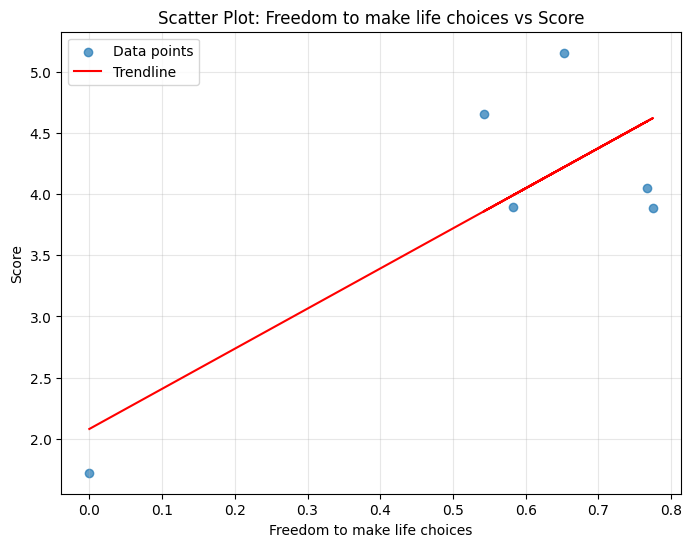

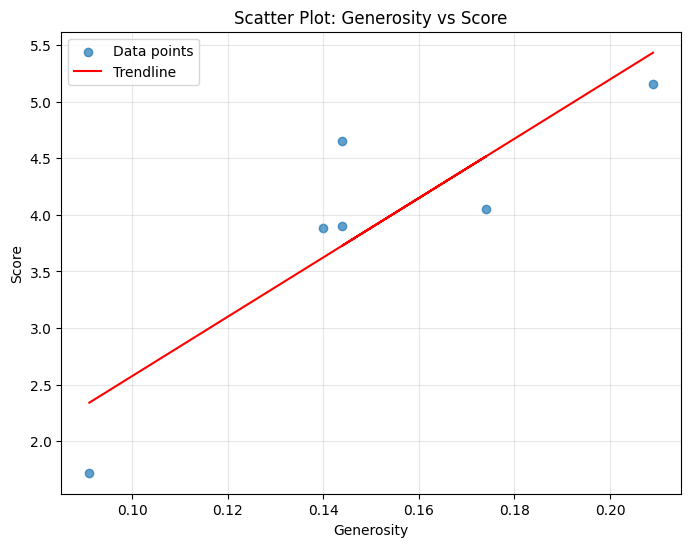

In [149]:
# Task 2: Create scatter plots with trendlines
for metric in metrics:
    valid_data = south_asia_df[[metric, 'score']].dropna().replace([np.inf, -np.inf], np.nan).dropna()

    if not valid_data.empty:
        x = valid_data[metric]
        y = valid_data['score']

        # Scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, alpha=0.7, label='Data points')
        plt.title(f'Scatter Plot: {metric} vs Score')
        plt.xlabel(metric)
        plt.ylabel('Score')

        # Add trendline
        z = np.polyfit(x, y, 1)  # Fit a linear regression line
        p = np.poly1d(z)
        plt.plot(x, p(x), color='red', label='Trendline')
        plt.legend()
        plt.grid(alpha=0.3)
        plt.show()

In [150]:
# Task 3: Identify strongest and weakest relationships
if correlations:
    strongest_metric = max(correlations, key=correlations.get)
    weakest_metric = min(correlations, key=correlations.get)

    print(f"The strongest relationship is between Score and {strongest_metric}, with a correlation of {correlations[strongest_metric]:.2f}.")
    print(f"The weakest relationship is between Score and {weakest_metric}, with a correlation of {correlations[weakest_metric]:.2f}.")
else:
    print("No valid correlations were calculated.")


The strongest relationship is between Score and Generosity, with a correlation of 0.87.
The weakest relationship is between Score and Freedom to make life choices, with a correlation of 0.80.


Task - 5 - Gap Analysis:

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the South Asia dataset
south_asia_df = pd.read_csv('south_asia_dataset.csv')

In [152]:
# Step 1: Add a new column for GDP-Score Gap
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

In [153]:
# Step 2: Rank the South Asian countries by the GDP-Score Gap
# Ascending order
ranked_ascending = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True).reset_index(drop=True)
# Descending order
ranked_descending = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False).reset_index(drop=True)

print("Top 3 countries with largest positive GDP-Score Gap:")
print(ranked_descending[['Country name', 'GDP-Score Gap']].head(3))

print("\nTop 3 countries with largest negative GDP-Score Gap:")
print(ranked_ascending[['Country name', 'GDP-Score Gap']].head(3))

Top 3 countries with largest positive GDP-Score Gap:
  Country name  GDP-Score Gap
0  Afghanistan         -1.093
1   Bangladesh         -2.764
2        India         -2.888

Top 3 countries with largest negative GDP-Score Gap:
  Country name  GDP-Score Gap
0        Nepal         -4.193
1     Pakistan         -3.588
2        India         -2.888


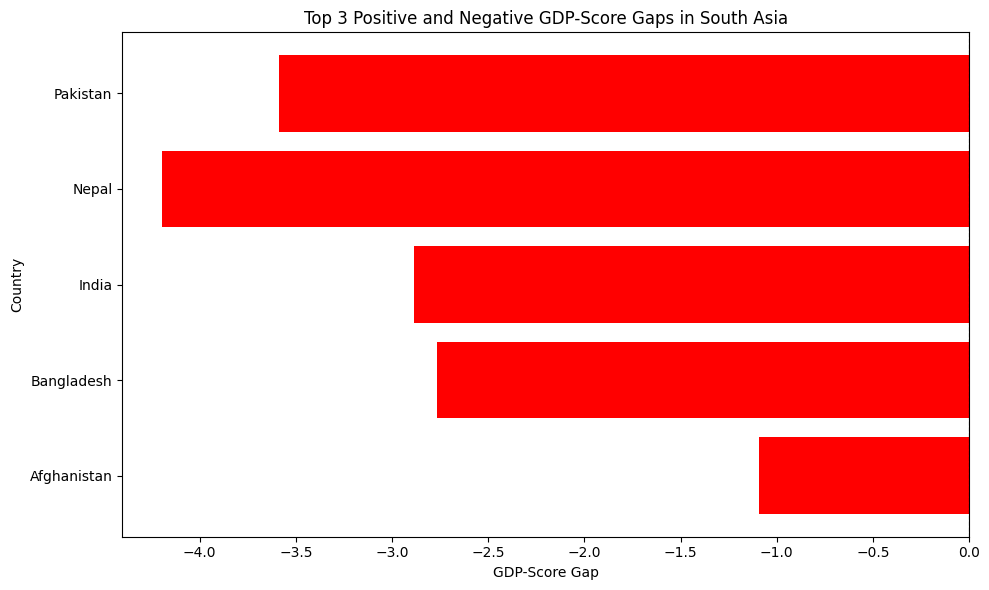

In [154]:
# Step 3: Highlight the top 3 largest positive and negative gaps using a bar chart
top_positive_gaps = ranked_descending.head(3)
top_negative_gaps = ranked_ascending.head(3)

# Combine for visualization
gap_data = pd.concat([top_positive_gaps, top_negative_gaps])

plt.figure(figsize=(10, 6))
plt.barh(gap_data['Country name'], gap_data['GDP-Score Gap'], color=['green' if x > 0 else 'red' for x in gap_data['GDP-Score Gap']])
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.title('Top 3 Positive and Negative GDP-Score Gaps in South Asia')
plt.tight_layout()
plt.show()

# **3.3 Problem - 3 - Comparative Analysis:**

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '/content/drive/My Drive/WHR-2024-5CS037.csv'
df = pd.read_csv(file_path)

In [156]:
# Task 1: Setup Task - Middle Eastern Dataset
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon",
    "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives",
    "Nepal", "Pakistan", "Sri Lanka"
]

middle_east_df = df[df['Country name'].isin(middle_east_countries)]
south_asia_df = df[df['Country name'].isin(south_asia_countries)]

In [157]:
# Task 2.1: Descriptive Statistics
mean_south_asia = south_asia_df['score'].mean()
std_south_asia = south_asia_df['score'].std()
mean_middle_east = middle_east_df['score'].mean()
std_middle_east = middle_east_df['score'].std()

print(f"South Asia - Mean: {mean_south_asia:.2f}, Std Dev: {std_south_asia:.2f}")
print(f"Middle East - Mean: {mean_middle_east:.2f}, Std Dev: {std_middle_east:.2f}")

if mean_middle_east > mean_south_asia:
    print("The Middle East has higher happiness scores on average.")
else:
    print("South Asia has higher happiness scores on average.")

South Asia - Mean: 3.90, Std Dev: 1.18
Middle East - Mean: 5.41, Std Dev: 1.57
The Middle East has higher happiness scores on average.


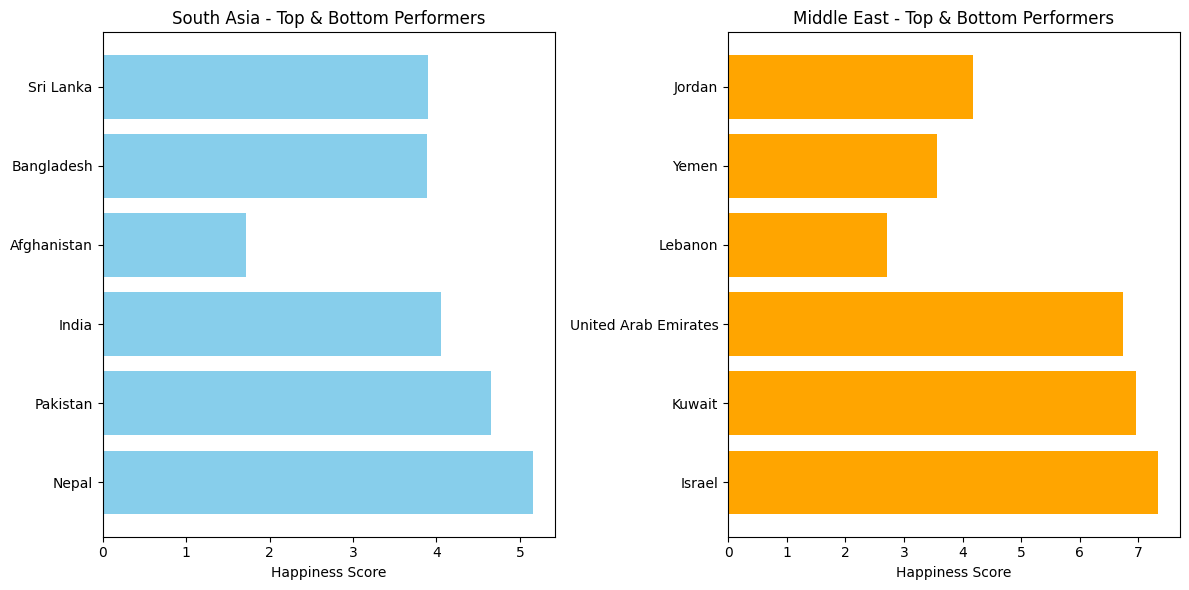

In [158]:
# Task 2.2: Top and Bottom Performers
top_3_sa = south_asia_df.nlargest(3, 'score')[['Country name', 'score']]
bottom_3_sa = south_asia_df.nsmallest(3, 'score')[['Country name', 'score']]
top_3_me = middle_east_df.nlargest(3, 'score')[['Country name', 'score']]
bottom_3_me = middle_east_df.nsmallest(3, 'score')[['Country name', 'score']]

# Plot top and bottom performers
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
top_bottom_sa = pd.concat([top_3_sa, bottom_3_sa])
top_bottom_me = pd.concat([top_3_me, bottom_3_me])

axes[0].barh(top_bottom_sa['Country name'], top_bottom_sa['score'], color='skyblue')
axes[0].set_title('South Asia - Top & Bottom Performers')
axes[0].set_xlabel('Happiness Score')

axes[1].barh(top_bottom_me['Country name'], top_bottom_me['score'], color='orange')
axes[1].set_title('Middle East - Top & Bottom Performers')
axes[1].set_xlabel('Happiness Score')

plt.tight_layout()
plt.show()

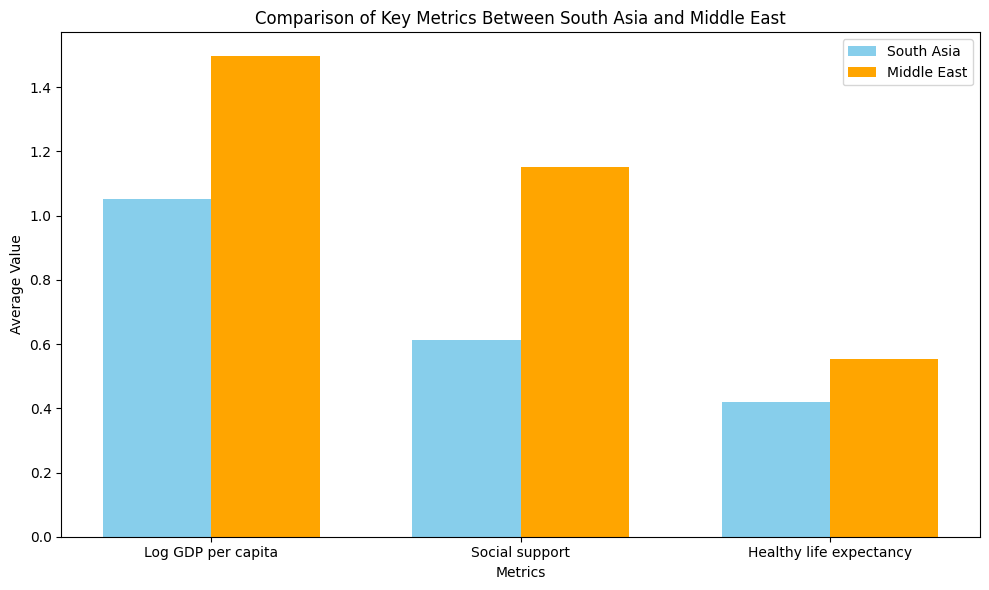

In [159]:
# Task 3: Metric Comparisons
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

mean_metrics_sa = south_asia_df[metrics].mean()
mean_metrics_me = middle_east_df[metrics].mean()

# Grouped bar chart
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width / 2, mean_metrics_sa, width, label='South Asia', color='skyblue')
ax.bar(x + width / 2, mean_metrics_me, width, label='Middle East', color='orange')

ax.set_xlabel('Metrics')
ax.set_ylabel('Average Value')
ax.set_title('Comparison of Key Metrics Between South Asia and Middle East')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

In [160]:
# Task 4: Happiness Disparity
range_sa = south_asia_df['score'].max() - south_asia_df['score'].min()
cv_sa = south_asia_df['score'].std() / south_asia_df['score'].mean()

range_me = middle_east_df['score'].max() - middle_east_df['score'].min()
cv_me = middle_east_df['score'].std() / middle_east_df['score'].mean()

print(f"South Asia - Range: {range_sa:.2f}, CV: {cv_sa:.2f}")
print(f"Middle East - Range: {range_me:.2f}, CV: {cv_me:.2f}")

if cv_me > cv_sa:
    print("The Middle East has greater variability in happiness scores.")
else:
    print("South Asia has greater variability in happiness scores.")

South Asia - Range: 3.44, CV: 0.30
Middle East - Range: 4.63, CV: 0.29
South Asia has greater variability in happiness scores.



Correlation Analysis for South Asia:
  Correlation between Freedom to make life choices and Score: 0.80


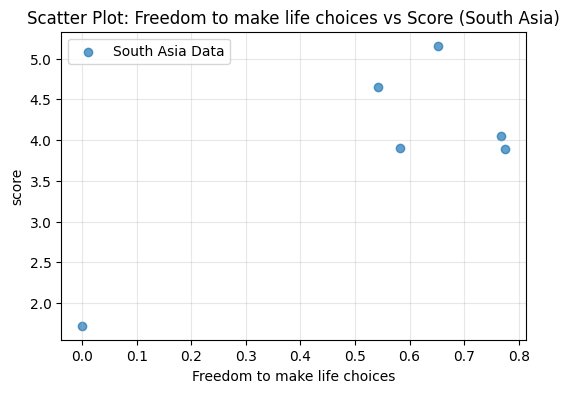

  Correlation between Generosity and Score: 0.87


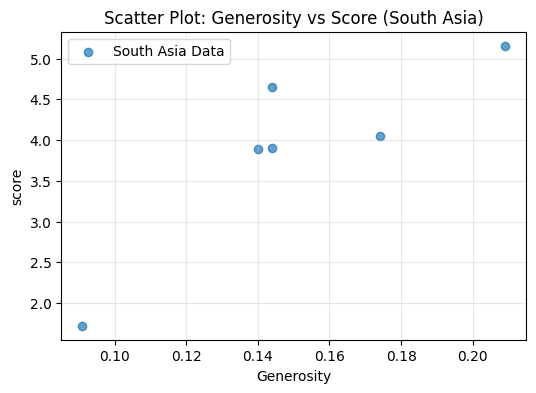


Correlation Analysis for Middle East:
  Correlation between Freedom to make life choices and Score: 0.86


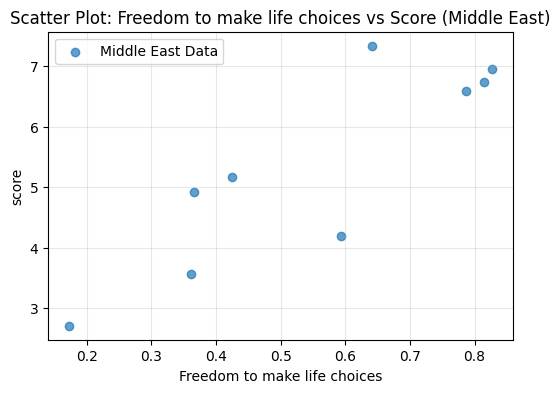

  Correlation between Generosity and Score: 0.63


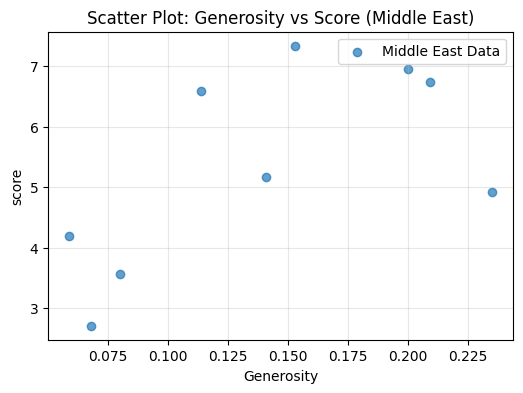

In [161]:
# Task 5: Correlation Analysis
metrics_corr = ['Freedom to make life choices', 'Generosity']

for region_name, region_df in [('South Asia', south_asia_df), ('Middle East', middle_east_df)]:
    print(f"\nCorrelation Analysis for {region_name}:")
    for metric in metrics_corr:
        valid_data = region_df[[metric, 'score']].dropna().replace([np.inf, -np.inf], np.nan).dropna()

        if valid_data.empty:
            print(f"  Cannot calculate correlation for {metric} and Score due to insufficient valid data.")
            continue

        # Calculate Pearson correlation manually
        x = valid_data[metric]
        y = valid_data['score']
        corr = np.corrcoef(x, y)[0, 1]
        print(f"  Correlation between {metric} and Score: {corr:.2f}")

        plt.figure(figsize=(6, 4))
        plt.scatter(x, y, alpha=0.7, label=f'{region_name} Data')
        plt.xlabel(metric)
        plt.ylabel('score')
        plt.title(f'Scatter Plot: {metric} vs Score ({region_name})')
        plt.grid(alpha=0.3)
        plt.legend()
        plt.show()

In [162]:
# Task 6: Outlier Detection
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers_sa = detect_outliers(south_asia_df, 'score')
outliers_me = detect_outliers(middle_east_df, 'score')

print(f"South Asia Outliers:\n{outliers_sa[['Country name', 'score']]}")
print(f"Middle East Outliers:\n{outliers_me[['Country name', 'score']]}")

South Asia Outliers:
    Country name  score
142  Afghanistan  1.721
Middle East Outliers:
Empty DataFrame
Columns: [Country name, score]
Index: []


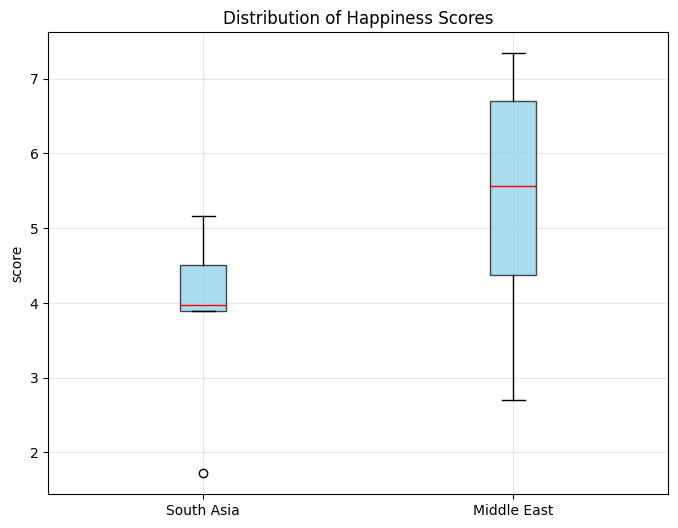

In [163]:
# Task 7: Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(
    [south_asia_df['score'], middle_east_df['score']],
    labels=['South Asia', 'Middle East'],
    patch_artist=True,
    boxprops=dict(facecolor='skyblue', alpha=0.7),
    medianprops=dict(color='red')
)
plt.title('Distribution of Happiness Scores')
plt.ylabel('score')
plt.grid(alpha=0.3)
plt.show()